In [1]:
## Machine Learning with R by Brett Lantz
## Chapter 6: Forecasting Numeric Data - Regression Methods

In [11]:
#Example 1: Challenger

In [ ]:
#------------------Linear regression----------------

In [15]:
launch <- read.csv("http://pastebin.com/raw/m43ukH1d")
head(launch)
str(launch)

o_ring_ct distress_ct temperature pressure launch_id
1         6           0          66       50         1
2         6           1          70       50         2
3         6           0          69       50         3
4         6           0          68       50         4
5         6           0          67       50         5
6         6           0          72       50         6

'data.frame':	23 obs. of  5 variables:
 $ o_ring_ct  : int  6 6 6 6 6 6 6 6 6 6 ...
 $ distress_ct: int  0 1 0 0 0 0 0 0 1 1 ...
 $ temperature: int  66 70 69 68 67 72 73 70 57 63 ...
 $ pressure   : int  50 50 50 50 50 50 100 100 200 200 ...
 $ launch_id  : int  1 2 3 4 5 6 7 8 9 10 ...


In [6]:
#Slope term
b <- cov(launch$temperature, launch$distress_ct) / var(launch$temperature)
b

[1] -0.05746032

In [10]:
#Intercept term
a <- mean(launch$distress_ct) - b * mean(launch$temperature)
a

[1] 4.301587

In [8]:
#Compute correlation between temperature and distress_ct
r <- cov(launch$temperature, launch$distress_ct) / (sd(launch$temperature) * sd(launch$distress_ct))
r

[1] -0.725671

In [9]:
#Alternative we can use built-in function in R
r <- cor(launch$temperature, launch$distress_ct)
r

[1] -0.725671

In [13]:
#Multiple linear regression
reg <- function(y, x) { 
    
    x <- as.matrix(x)
    x <- cbind(Intercept = 1, x)
    solve(t(x) %*% x) %*% t(x) %*% y
}

In [17]:
reg(y = launch$distress_ct, x = launch[3])

[,1]
Intercept    4.30158730
temperature -0.05746032

In [18]:
reg(y = launch$distress_ct, x = launch[3:5])

[,1]
Intercept    3.814247216
temperature -0.055068768
pressure     0.003428843
launch_id   -0.016734090

In [19]:
#Example: predicting medical expenses using linear regression

In [21]:
#Step 1: Collecting the data
#Step 2: Exploring and preparing the data
insurance <- read.csv("http://pastebin.com/raw/PSRr4pLn", dec = ".", sep = ",")
head(insurance)
str(insurance)

age    sex    bmi children smoker    region   charges
1  19 female 27.900        0    yes southwest 16884.924
2  18   male 33.770        1     no southeast  1725.552
3  28   male 33.000        3     no southeast  4449.462
4  33   male 22.705        0     no northwest 21984.471
5  32   male 28.880        0     no northwest  3866.855
6  31 female 25.740        0     no southeast  3756.622

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [22]:
#Check dependant variable charges
summary(insurance$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

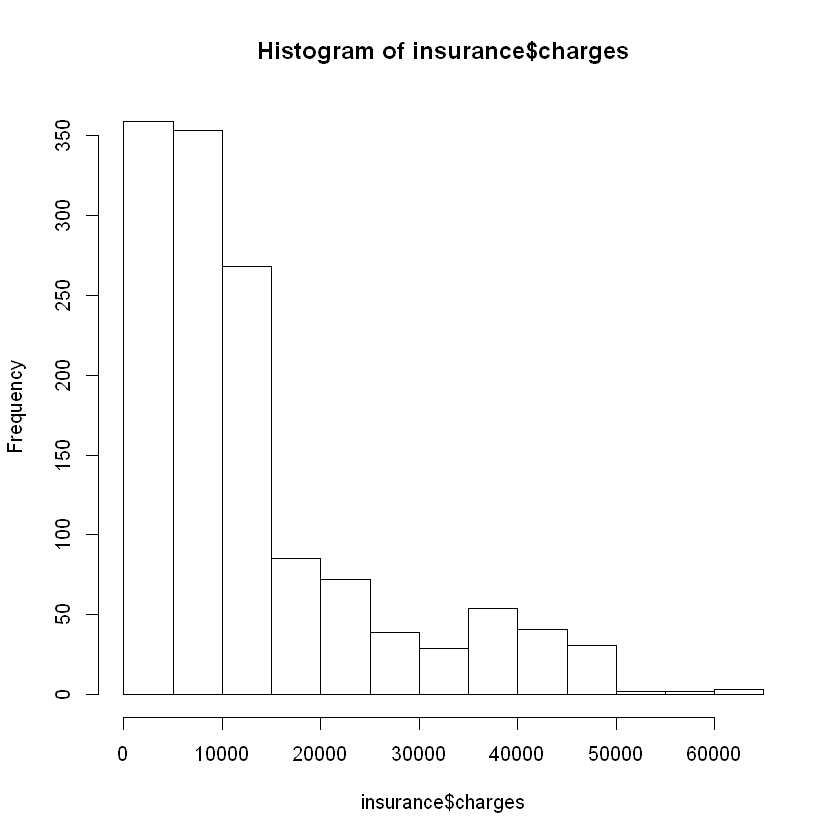

In [23]:
#Plot histogram charges
hist(insurance$charges)

In [24]:
summary(insurance$region)

northeast northwest southeast southwest 
      324       325       364       325

In [25]:
#Exploring relationships among features - the correlation matrix
cor(insurance[c("age", "bmi", "children", "charges")])

age       bmi   children    charges
age      1.0000000 0.1092719 0.04246900 0.29900819
bmi      0.1092719 1.0000000 0.01275890 0.19834097
children 0.0424690 0.0127589 1.00000000 0.06799823
charges  0.2990082 0.1983410 0.06799823 1.00000000

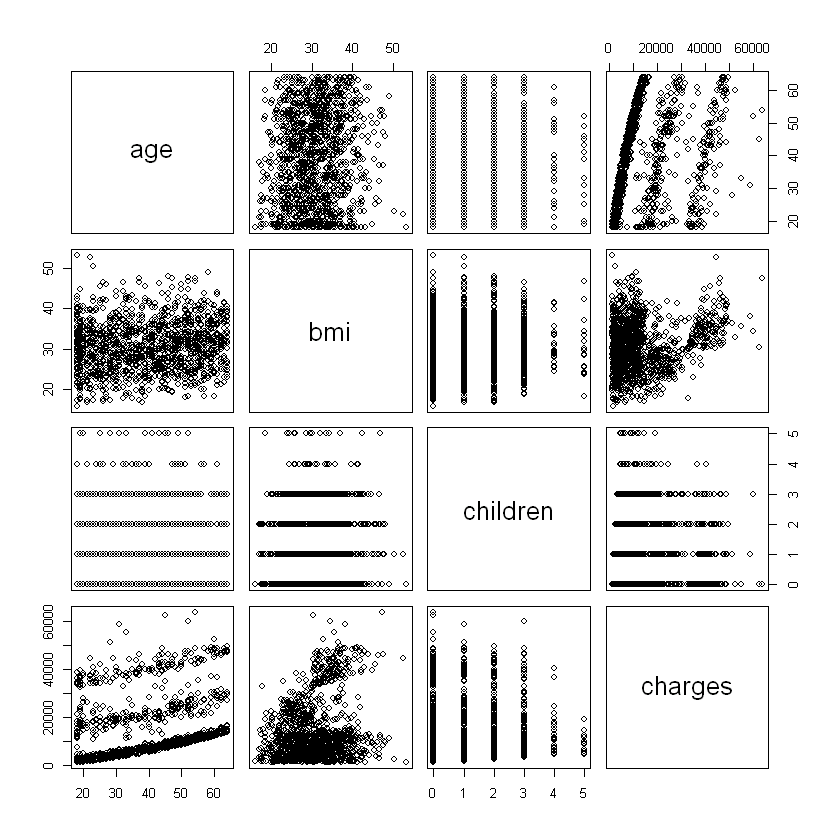

In [28]:
#Visualizing relationships among features - the scatterplot matrix
pairs(insurance[c("age", "bmi", "children", "charges")])

In [29]:
install.packages("psych", repos = "https://cran.r-project.org")
library(psych)

also installing the dependency 'mnormt'



package 'mnormt' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpQtaHQQ\downloaded_packages


Warning message:
: package 'psych' was built under R version 3.2.5

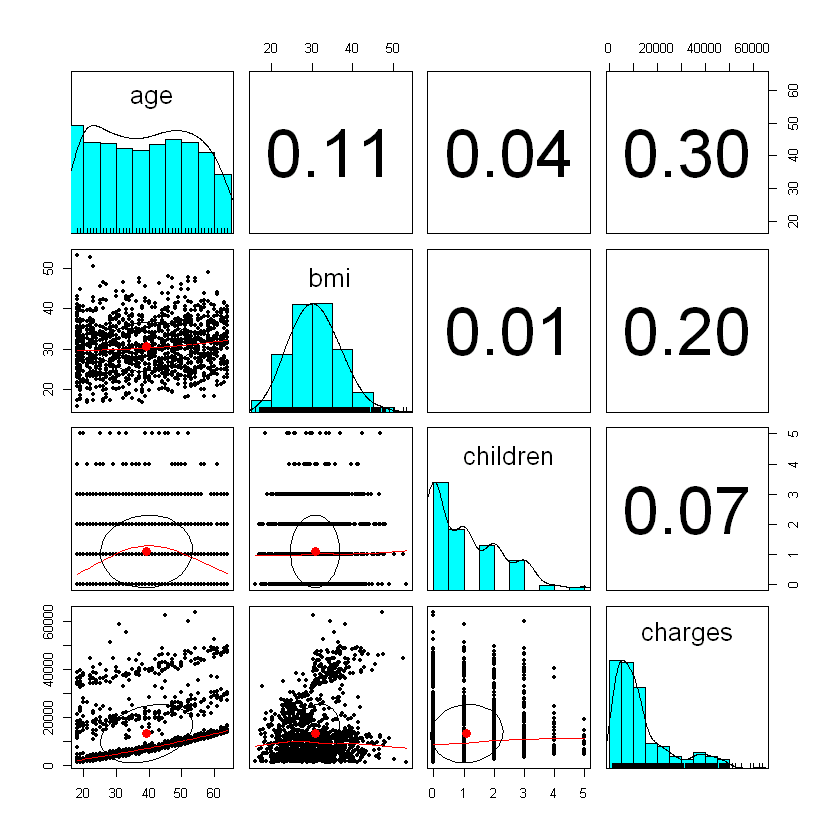

In [30]:
pairs.panels(insurance[c("age", "bmi", "children", "charges")])

In [34]:
#Step 3: Training a model on the data
ins_model <- lm(charges ~ age + children + bmi + sex + smoker + region, data = insurance)
#or lm(charges ~ ., data = insurance)
ins_model


Call:
lm(formula = charges ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Coefficients:
    (Intercept)              age         children              bmi  
       -11938.5            256.9            475.5            339.2  
        sexmale        smokeryes  regionnorthwest  regionsoutheast  
         -131.3          23848.5           -353.0          -1035.0  
regionsouthwest  
         -960.1  


In [37]:
#Step 4: Evaluating model performance
summary(ins_model)


Call:
lm(formula = charges ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
bmi                339.2       28.6  11.860  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1

In [38]:
#Step 5: improving model performance

In [40]:
#Model specification - adding non-linear relationships
insurance$age2 <- insurance$age^2

In [43]:
#Transformation - converting a numeric variable to a binary indicator
insurance$bmi30 <- ifelse(insurance$bmi >= 30, 1, 0)
head(insurance$bmi30)

[1] 0 1 1 0 0 0

In [46]:
#Model specification - adding interaction effects
#Putting it all together - an improved regression model
#(added a non-linear regression term, created an indicator for obesity, sepecified interaction among bmi and smokeing)
ins_model2 <- lm(charges ~ age + age2 + children + bmi + sex + bmi30*smoker + region, data = insurance)
ins_model2
summary(ins_model2)


Call:
lm(formula = charges ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = insurance)

Coefficients:
    (Intercept)              age             age2         children  
        134.251          -32.685            3.732          678.561  
            bmi          sexmale            bmi30        smokeryes  
        120.020         -496.824        -1000.140        13404.687  
regionnorthwest  regionsoutheast  regionsouthwest  bmi30:smokeryes  
       -279.204         -828.547        -1222.644        19810.753  



Call:
lm(formula = charges ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-17296.4  -1656.0  -1263.3   -722.1  24160.2 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       134.2509  1362.7511   0.099 0.921539    
age               -32.6851    59.8242  -0.546 0.584915    
age2                3.7316     0.7463   5.000 6.50e-07 ***
children          678.5612   105.8831   6.409 2.04e-10 ***
bmi               120.0196    34.2660   3.503 0.000476 ***
sexmale          -496.8245   244.3659  -2.033 0.042240 *  
bmi30           -1000.1403   422.8402  -2.365 0.018159 *  
smokeryes       13404.6866   439.9491  30.469  < 2e-16 ***
regionnorthwest  -279.2038   349.2746  -0.799 0.424212    
regionsoutheast  -828.5467   351.6352  -2.356 0.018604 *  
regionsouthwest -1222.6437   350.5285  -3.488 0.000503 ***
bmi30:smokeryes 19810.7533   604.6567  32.764  < 2e-16 ***


In [47]:
#Example: Estimating the quality of wines with regression trees and model trees

In [49]:
#Step 1: Collecting data
#Step 2: Exploring and preparing data
wine <- read.csv("http://pastebin.com/raw/CZVgJXhW", dec = ".")
head(wine)
str(wine)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1           7.0             0.27        0.36           20.7     0.045
2           6.3             0.30        0.34            1.6     0.049
3           8.1             0.28        0.40            6.9     0.050
4           7.2             0.23        0.32            8.5     0.058
5           7.2             0.23        0.32            8.5     0.058
6           8.1             0.28        0.40            6.9     0.050
  free.sulfur.dioxide total.sulfur.dioxide density   pH sulphates alcohol
1                  45                  170  1.0010 3.00      0.45     8.8
2                  14                  132  0.9940 3.30      0.49     9.5
3                  30                   97  0.9951 3.26      0.44    10.1
4                  47                  186  0.9956 3.19      0.40     9.9
5                  47                  186  0.9956 3.19      0.40     9.9
6                  30                   97  0.9951 3.26      0.44    10.1
  quality
1       6
2       6
3       6
4       6
5       6
6       6

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


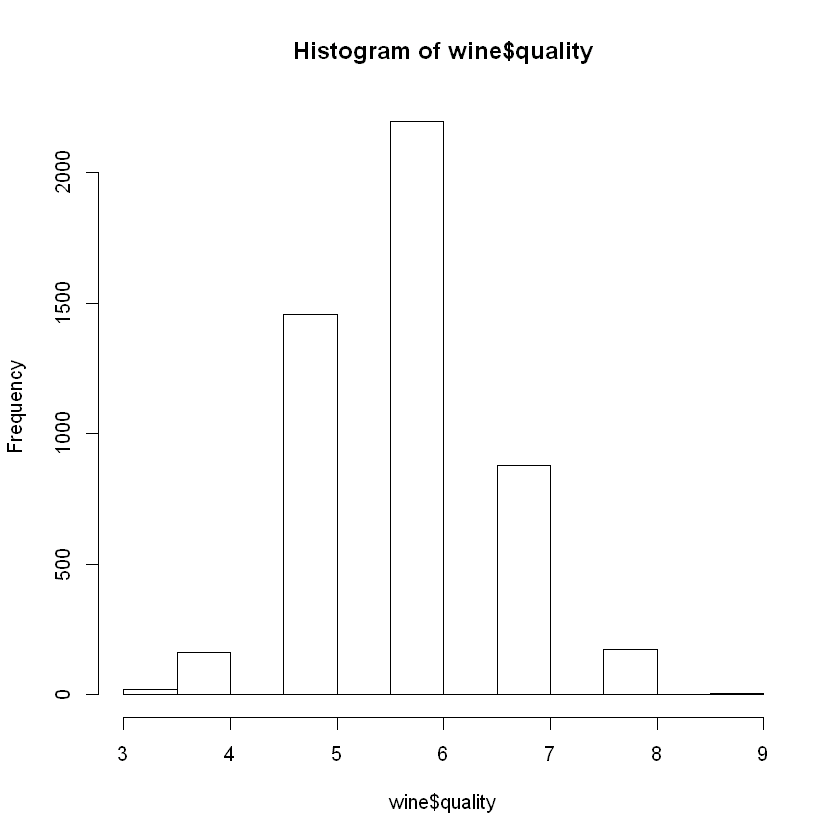

In [50]:
hist(wine$quality)

In [51]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [52]:
#Split into training set and test set ( data is already sorted randomly) (75% training-25% test)
wine_train <- wine[1:3750,]
wine_test <- wine[3751:4898,]

In [54]:
#Training a model on the data
install.packages("rpart", repos = "https://cran.r-project.org")
library(rpart)

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpQtaHQQ\downloaded_packages


In [59]:
m.rpart <- rpart(quality ~ ., data = wine_train)
m.rpart
summary(m.rpart)

n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 3140.06000 5.886933  
   2) alcohol< 10.85 2473 1510.66200 5.609381  
     4) volatile.acidity>=0.2425 1406  740.15080 5.402560  
       8) volatile.acidity>=0.4225 182   92.99451 4.994505 *
       9) volatile.acidity< 0.4225 1224  612.34560 5.463235 *
     5) volatile.acidity< 0.2425 1067  631.12090 5.881912 *
   3) alcohol>=10.85 1277 1069.95800 6.424432  
     6) free.sulfur.dioxide< 11.5 93   99.18280 5.473118 *
     7) free.sulfur.dioxide>=11.5 1184  879.99920 6.499155  
      14) alcohol< 11.85 611  447.38130 6.296236 *
      15) alcohol>=11.85 573  380.63180 6.715532 *

Call:
rpart(formula = quality ~ ., data = wine_train)
  n= 3750 

          CP nsplit rel error    xerror       xstd
1 0.17816211      0 1.0000000 1.0003622 0.02388415
2 0.04439109      1 0.8218379 0.8268507 0.02246875
3 0.02890893      2 0.7774468 0.7923440 0.02225114
4 0.01655575      3 0.7485379 0.7599657 0.02098406
5 0.01108600      4 0.7319821 0.7479249 0.02055665
6 0.01000000      5 0.7208961 0.7396954 0.02032452

Variable importance
             alcohol              density            chlorides 
                  38                   23                   12 
    volatile.acidity total.sulfur.dioxide  free.sulfur.dioxide 
                  12                    7                    6 
           sulphates                   pH       residual.sugar 
                   1                    1                    1 

Node number 1: 3750 observations,    complexity param=0.1781621
  mean=5.886933, MSE=0.8373493 
  left son=2 (2473 obs) right son=3 (1277 obs)
  Primary splits:
      alco

In [60]:
#Visualizing decision trees
install.packages("rpart.plot", repos = "https://cran.r-project.org")
library(rpart.plot)

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpQtaHQQ\downloaded_packages


Warning message:
: package 'rpart.plot' was built under R version 3.2.5

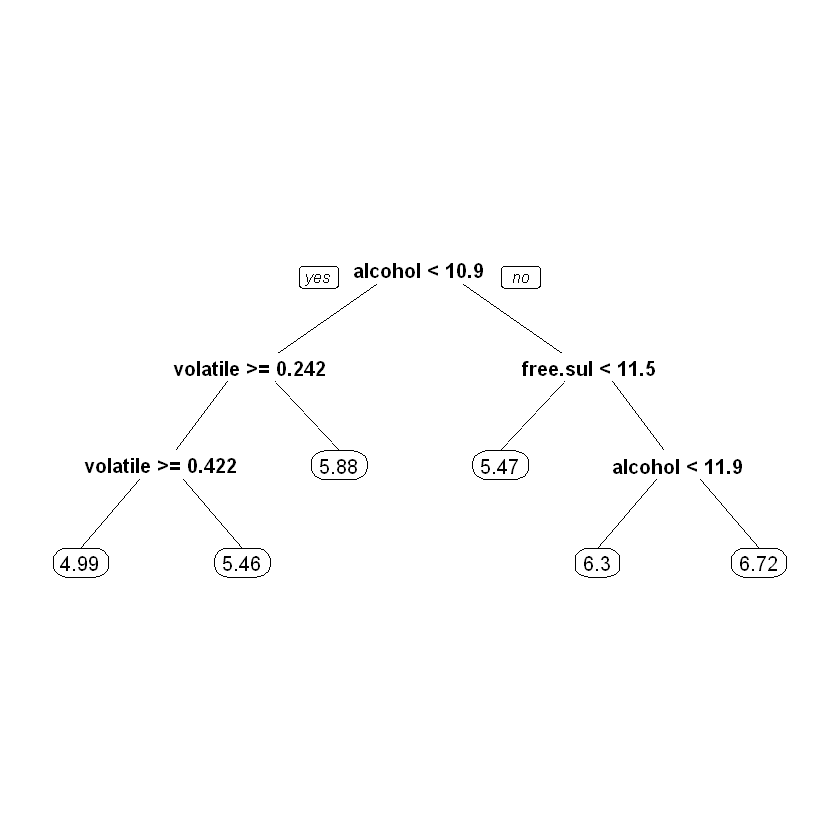

In [61]:
rpart.plot(m.rpart, digits = 3)

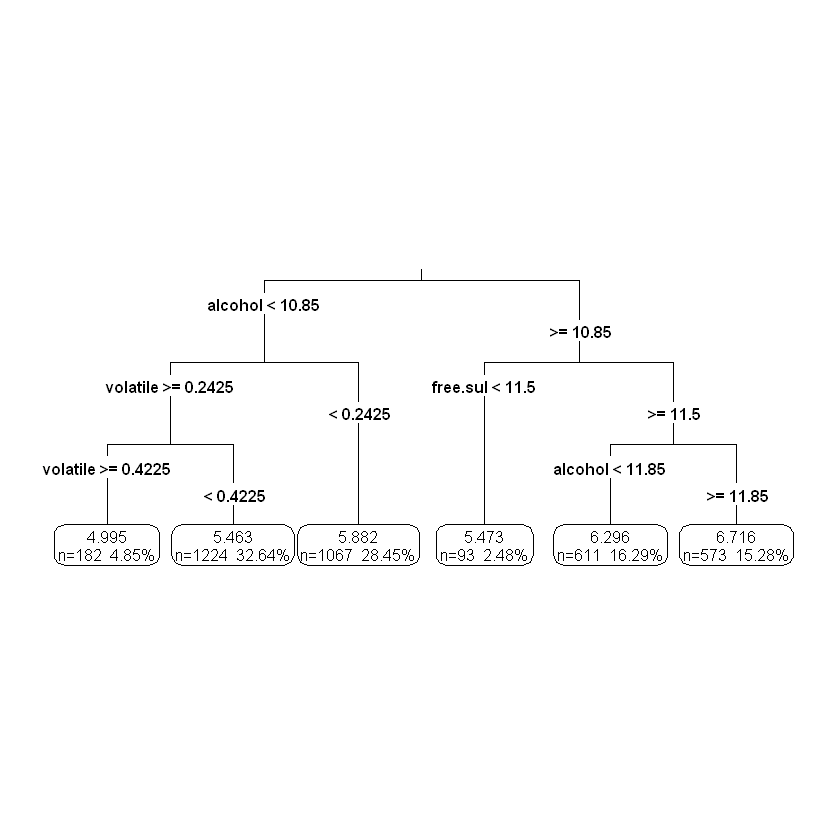

In [62]:
rpart.plot(m.rpart, digits = 4, fallen.leaves = TRUE, type = 3, extra = 101)

In [66]:
#Step 4: Evaluating the model
p.rpart <- predict(m.rpart, wine_test)
head(p.rpart)

3751     3752     3753     3754     3755     3756 
5.881912 5.881912 5.463235 5.463235 6.715532 6.296236

In [67]:
summary(p.rpart)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.995   5.463   5.882   5.999   6.296   6.716 

In [68]:
summary(wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.848   6.000   8.000 

In [69]:
cor(p.rpart, wine_test$quality)

[1] 0.4931608

In [72]:
#Measuring performance with mean absolute error
MAE <- function(actual, predicted) {
    
    mean(abs(actual - predicted))
}

In [74]:
MAE(p.rpart, wine_test$quality)

[1] 0.5732104

In [75]:
mean(wine_train$quality)

[1] 5.886933

In [77]:
MAE(5.87, wine_test$quality)

[1] 0.5815679

In [79]:
#Step 5: Improving the model performance
library(RWeka)
m.m5p <- M5P(quality ~ ., data = wine_train)
m.m5p

M5 pruned model tree:
(using smoothed linear models)

alcohol <= 10.85 : LM1 (2473/77.476%)
alcohol >  10.85 : 
|   free.sulfur.dioxide <= 20.5 : 
|   |   free.sulfur.dioxide <= 10.5 : LM2 (81/104.574%)
|   |   free.sulfur.dioxide >  10.5 : LM3 (224/87.002%)
|   free.sulfur.dioxide >  20.5 : LM4 (972/84.073%)

LM num: 1
quality = 
	0.0777 * fixed.acidity 
	- 2.3087 * volatile.acidity 
	+ 0.0732 * residual.sugar 
	+ 0.0022 * free.sulfur.dioxide 
	- 155.0175 * density 
	+ 0.6462 * pH 
	+ 0.7923 * sulphates 
	+ 0.0758 * alcohol 
	+ 156.2102

LM num: 2
quality = 
	-0.0314 * fixed.acidity 
	- 0.3415 * volatile.acidity 
	+ 1.7929 * citric.acid 
	+ 0.1316 * residual.sugar 
	- 0.2456 * chlorides 
	+ 0.1212 * free.sulfur.dioxide 
	- 178.6281 * density 
	+ 0.054 * pH 
	+ 0.1392 * sulphates 
	+ 0.0108 * alcohol 
	+ 180.6069

LM num: 3
quality = 
	-0.2019 * fixed.acidity 
	- 2.3804 * volatile.acidity 
	- 1.0851 * citric.acid 
	+ 0.0905 * residual.sugar 
	- 0.2456 * chlorides 
	+ 0.0041 * free.sulf

In [81]:
summary(m.m5p)


=== Summary ===

Correlation coefficient                  0.5932
Mean absolute error                      0.5804
Root mean squared error                  0.7367
Relative absolute error                 83.3671 %
Root relative squared error             80.507  %
Total Number of Instances             3750     

In [86]:
p.m5p <- predict(m.m5p, wine_test)
summary(p.m5p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.170   5.646   6.032   6.079   6.501   7.913 

In [87]:
cor(p.m5p, wine_test$quality)

[1] 0.531723

In [88]:
MAE(wine_test$quality, p.m5p)

[1] 0.5660352